In [1]:
!pip install opencv-python rembg numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.3 MB/s eta 0:00:00


In [3]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.3 MB/s eta 0:00:00


In [4]:
import cv2
import numpy as np
from rembg import remove
from matplotlib import pyplot as plt
from PIL import Image

In [6]:
from google.colab import files
uploaded = files.upload()  # Upload both 'person.jpg' and 'background.jpg'


Saving person.jpg to person (1).jpg


In [7]:
from google.colab import files
uploaded = files.upload()  # Upload both 'person.jpg' and 'background.jpg'


Saving background.jpg to background.jpg


In [11]:
bg = cv2.imread('background.jpg')
fg = cv2.imread('person.jpg')

In [8]:
input_pil = Image.open('person.jpg')
output_pil = remove(input_pil)
output_pil.save("person_no_bg.png")

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 103GB/s]


In [9]:
person = cv2.imread("person_no_bg.png", cv2.IMREAD_UNCHANGED)

In [10]:
scale_factor = 0.6  # adjust for your use case
person = cv2.resize(person, (0, 0), fx=scale_factor, fy=scale_factor)

In [10]:
x_offset = 300  # adjust for desired placement
y_offset = bg.shape[0] - person.shape[0] - 30

In [13]:
x_offset = 300  # adjust for desired placement
y_offset = bg.shape[0] - person.shape[0] - 30

for c in range(0, 3):
    bg[y_offset:y_offset+person.shape[0], x_offset:x_offset+person.shape[1], c] = \
        person[:, :, c] * (person[:, :, 3] / 255.0) + \
        bg[y_offset:y_offset+person.shape[0], x_offset:x_offset+person.shape[1], c] * (1.0 - person[:, :, 3] / 255.0)

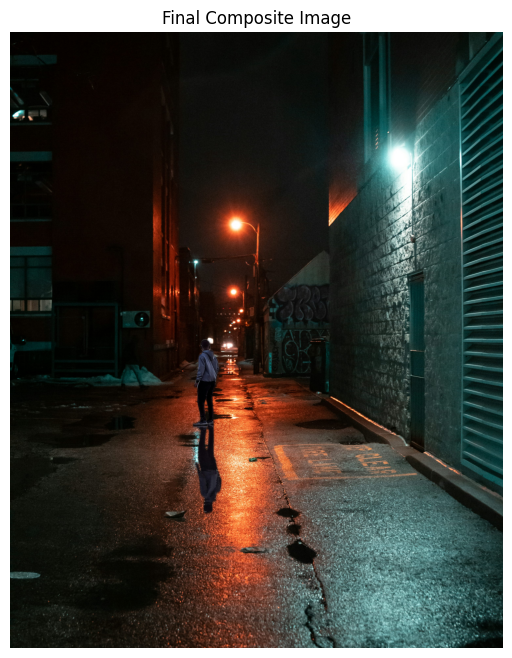

In [14]:
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(bg, cv2.COLOR_BGR2RGB))
plt.title("Final Composite Image")
plt.axis("off")
plt.show()

In [15]:
cv2.imwrite("final_output.jpg", bg)

True